In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
df = pd.read_csv("Lekagul-Sensor-Data.csv")
df[1:10]

,Timestamp,car-id,car-type,gate-name
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
5,2015-05-01 01:24:02,20154301124328-262,4,general-gate5
6,2015-05-01 01:31:41,20153101013141-937,1,entrance3
7,2015-05-01 01:33:57,20154301124328-262,4,entrance4
8,2015-05-01 01:53:34,20153101013141-937,1,general-gate1
9,2015-05-01 01:56:20,20153101013141-937,1,ranger-stop2


In [4]:
# Rename car-type = "2P" to "7" to allow for numeric conversion
print df['car-type'].unique()
df['car-type'][df['car-type']=='2P'] = '7'
print df['car-type'].unique()

['4' '1' '3' '5' '2' '2P' '6']
['4' '1' '3' '5' '2' '7' '6']


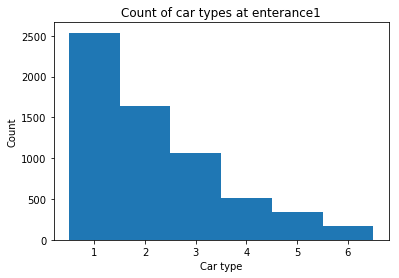

In [5]:
# 1) Plot a histogram of car types at entrance 1.
plt.hist(pd.to_numeric(df[df["gate-name"] == "entrance1"]["car-type"]), bins = np.arange(7)+0.5)
plt.xlabel("Car type")
plt.ylabel("Count")
plt.title("Count of car types at enterance1")

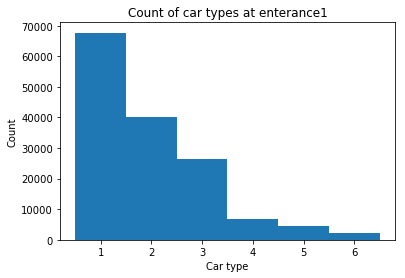

In [6]:
# 2) Plot histograms of car types at all entrances.
plt.hist(pd.to_numeric(df["car-type"]), bins=np.arange(7)+0.5)
plt.xlabel("Car type")
plt.ylabel("Count")
plt.title("Count of car types at All Entrances")

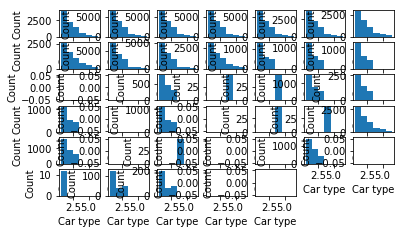

In [7]:
# 2) Plot histograms of car types at all entrances by enterance.
entrances = df['gate-name'].unique()
num_entrances = len(entrances)
grid_dim = int(np.ceil(np.sqrt(num_entrances)))

break_out = False
count = 0
for i in range(grid_dim):
    for j in range(grid_dim):
        ent = entrances[count]
        ax = plt.subplot2grid((grid_dim,grid_dim), (i,j))
        ax = plt.hist(pd.to_numeric(df[df["gate-name"] == ent]["car-type"]),bins=np.arange(7)+0.5)
        ax = plt.xlabel("Car type") 
        ax = plt.ylabel("Count")
        
        count += 1
        if count == num_entrances:
            break_out = True
            break
    if break_out == True:
        break

plt.figure(figsize=(20,20))
plt.show()



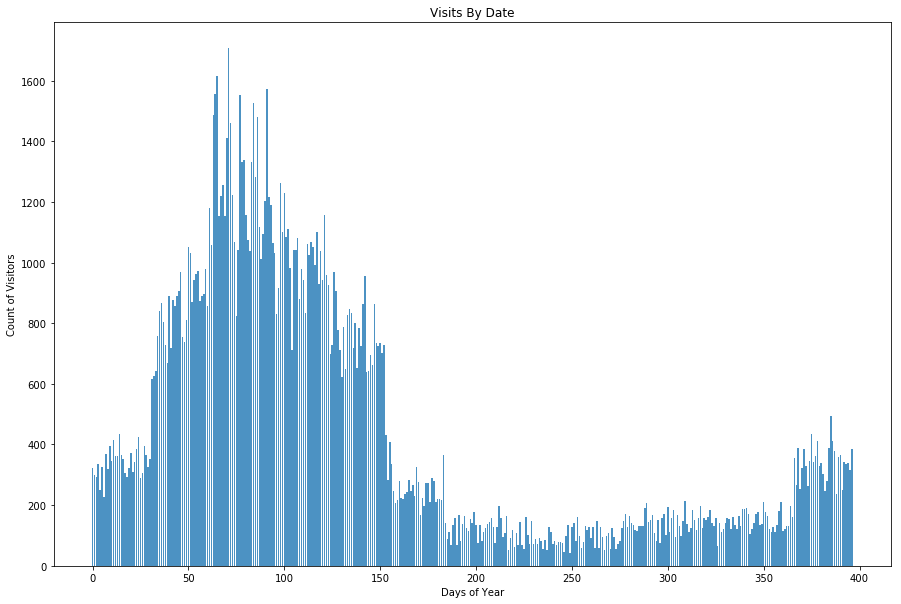

In [8]:
# 3) Plot the count of daily visits grouped by day for the whole dataset.
# Count the daily visits 
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date)

# plot the visit count per day 
plt.figure(figsize=(15,10))
y_pos = np.arange(len(g.count()))
plt.bar(y_pos,g.count()["Timestamp"], align='center', alpha=0.8)
plt.xlabel('Days of Year')
plt.ylabel('Count of Visitors')
plt.title('Visits By Date')

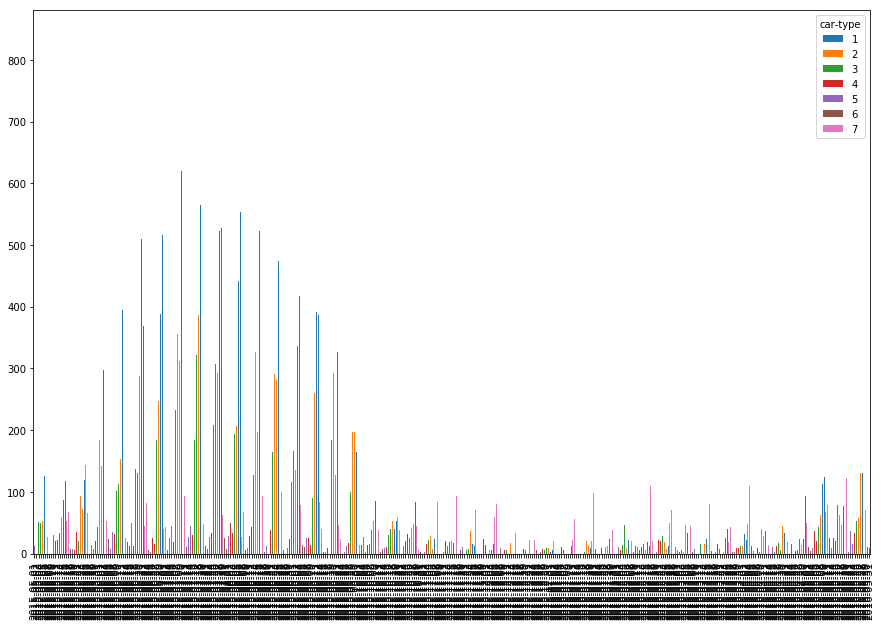

In [ ]:
# 4) Same as plot (3), but plot a separate line for each car type.
g = df.groupby([pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date,'car-type']).size()
# ag = g.unstack()
# ag[1:10]
# g.unstack().plot(kind='bar')
g.unstack().plot.bar(stacked=False, figsize=(15,10))

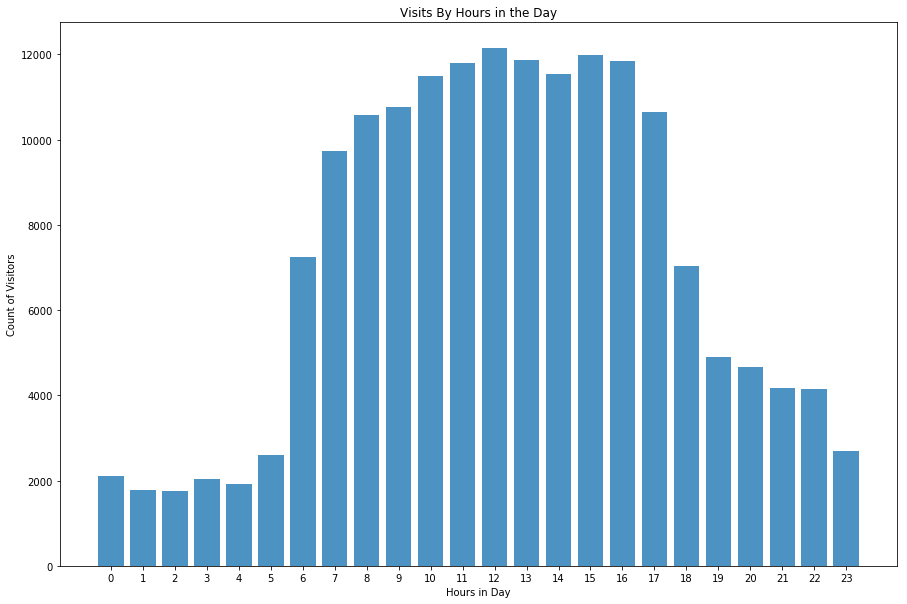

In [24]:
# 5) Repeat plot 3, but group by the hour.
# Count the hourly visits 
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).hour)

# plot the visit count per day 
y_pos = np.arange(len(g.count()))
plt.figure(figsize=(15,10))
plt.bar(y_pos,g.count()["Timestamp"], align='center', alpha=0.8)
plt.xticks(y_pos, g.indices)
plt.xlabel('Hours in Day')
plt.ylabel('Count of Visitors')
plt.title('Visits By Hours in the Day')


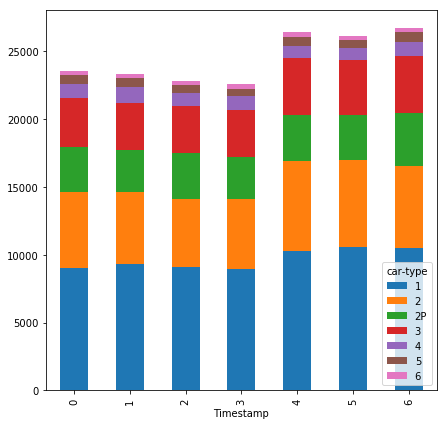

In [23]:
# 6) Repeat plot 4, grouping by the day of week, and show a stacked bar chart for each car type.
g = df.groupby([pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).dayofweek,'car-type']).size()
g.unstack().plot.bar(stacked=True, figsize = (7,7))